In [19]:
#load data
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

df = pd.read_csv("/content/injury_data.csv")
print(df.to_string())

     Player_Age  Player_Weight  Player_Height  Previous_Injuries  Training_Intensity  Recovery_Time  Likelihood_of_Injury
0            24      66.251933     175.732429                1.0            0.457929            5.0                     0
1            37      70.996271     174.581650                0.0            0.226522            6.0                     1
2            32      80.093781     186.329618                0.0            0.613970            2.0                     1
3            28      87.473271     175.504240                1.0            0.252858            4.0                     1
4            25      84.659220     190.175012                0.0            0.577632            1.0                     1
5            38            NaN     206.631824                1.0            0.359209            4.0                     0
6            24      70.126050     177.044588                0.0            0.823552            2.0                     0
7            36      79.

Use this dataset and find what preprocessing needs to be done(Missing values, NULL values, Values that are hard to access due to datatype). Also clean the data if needed. You may drop any column you find irrelevant to your analysis. (do mention the reason to dropping or replacing the data.)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         994 non-null    float64
 2   Player_Height         995 non-null    float64
 3   Previous_Injuries     999 non-null    float64
 4   Training_Intensity    997 non-null    float64
 5   Recovery_Time         993 non-null    float64
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [21]:
df.isnull().sum()

Player_Age              0
Player_Weight           6
Player_Height           5
Previous_Injuries       1
Training_Intensity      3
Recovery_Time           7
Likelihood_of_Injury    0
dtype: int64

<Axes: >

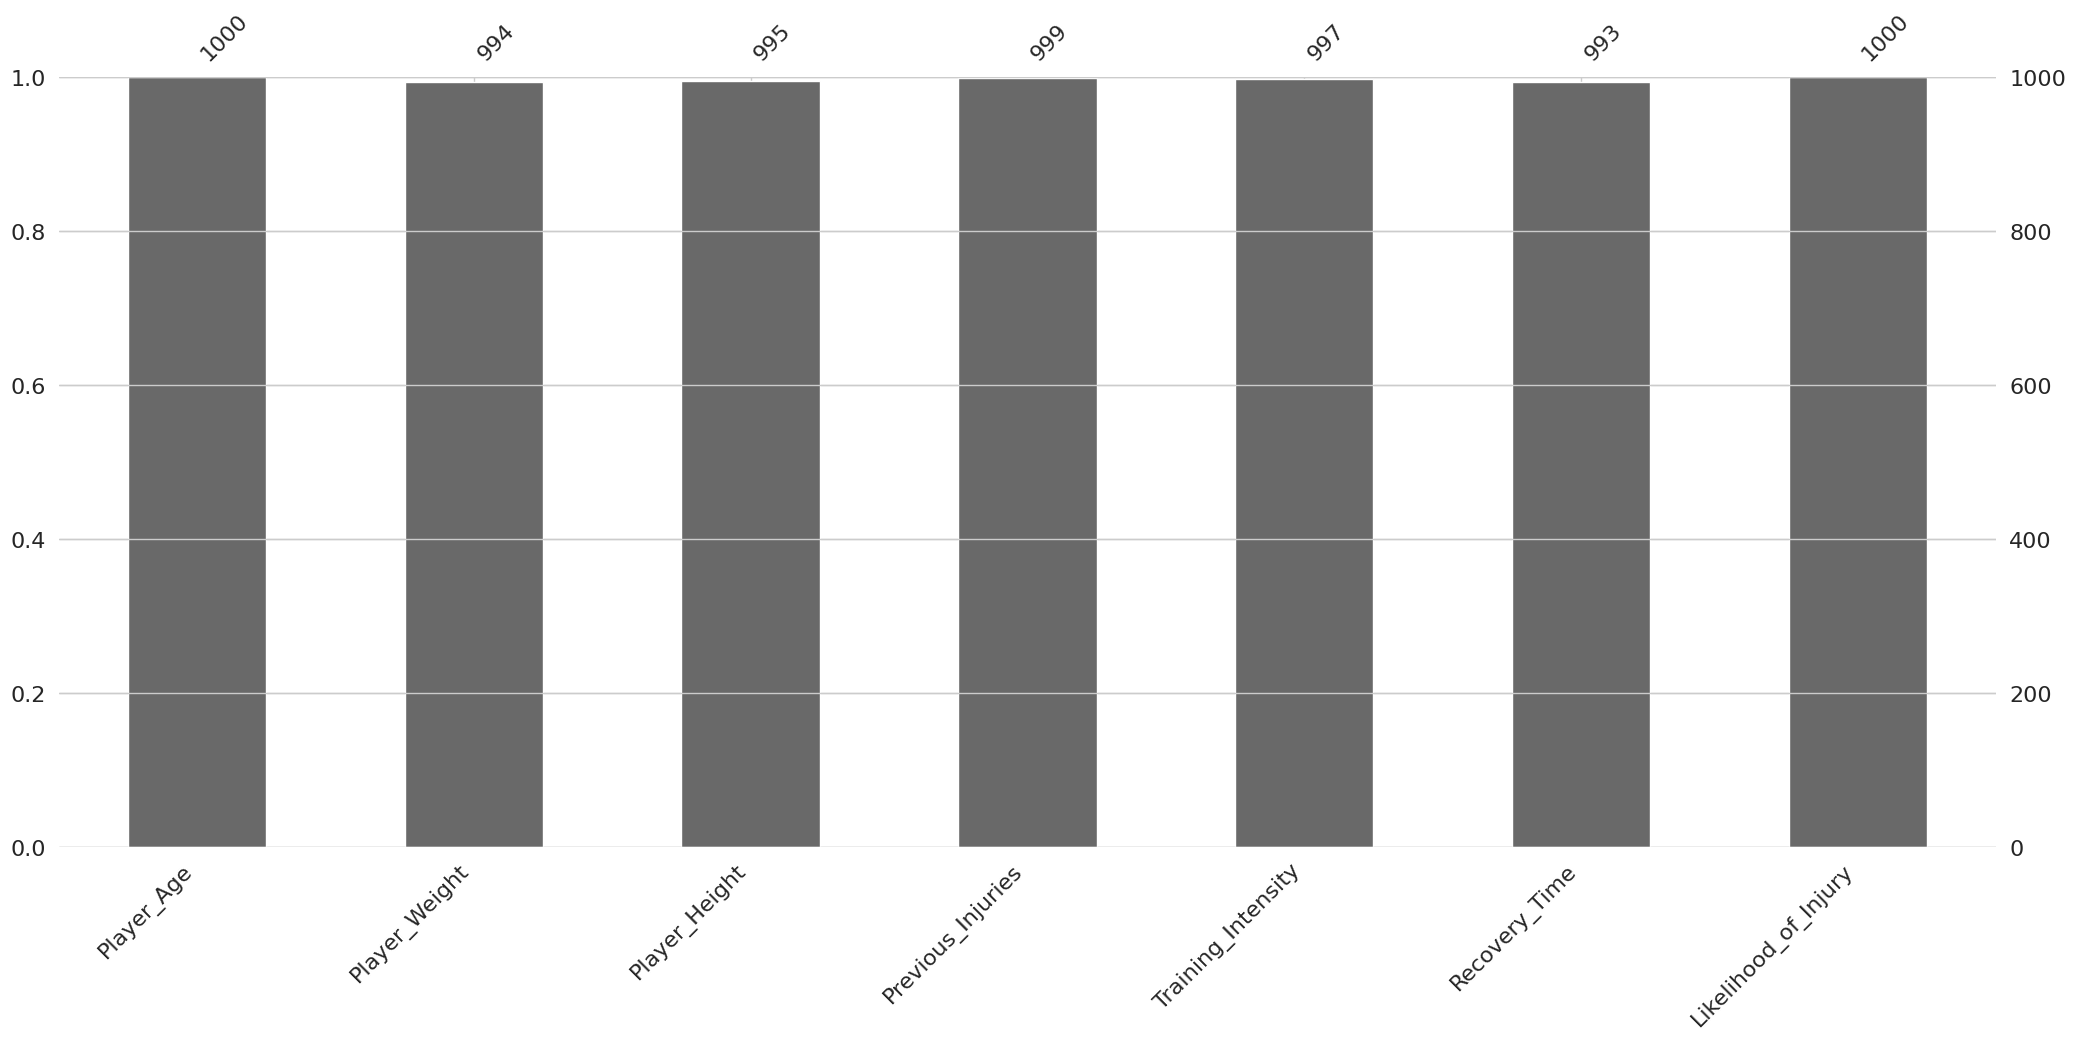

In [22]:
import missingno as msno
msno.bar(df)

In [23]:
df['Player_Weight'].fillna(df['Player_Weight'].median(),inplace=True)
df['Player_Height'].fillna(df['Player_Height'].median(),inplace=True)
df['Previous_Injuries'].fillna(df['Previous_Injuries'].median(),inplace=True)
df['Training_Intensity'].fillna(df['Training_Intensity'].median(),inplace=True)
df['Recovery_Time'].fillna(df['Recovery_Time'].median(),inplace=True)
print(df.to_string())

     Player_Age  Player_Weight  Player_Height  Previous_Injuries  Training_Intensity  Recovery_Time  Likelihood_of_Injury
0            24      66.251933     175.732429                1.0            0.457929            5.0                     0
1            37      70.996271     174.581650                0.0            0.226522            6.0                     1
2            32      80.093781     186.329618                0.0            0.613970            2.0                     1
3            28      87.473271     175.504240                1.0            0.252858            4.0                     1
4            25      84.659220     190.175012                0.0            0.577632            1.0                     1
5            38      74.981828     206.631824                1.0            0.359209            4.0                     0
6            24      70.126050     177.044588                0.0            0.823552            2.0                     0
7            36      79.

show the correlation among the dataset

In [24]:
df.corr()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
Player_Age,1.000000,-0.039003,0.046471,-0.042621,0.039401,-0.038000,0.000153
Player_Weight,-0.039003,1.000000,0.028536,0.040243,0.039838,-0.054829,-0.000950
Player_Height,0.046471,0.028536,1.000000,0.012752,0.046665,0.027198,0.029079
Previous_Injuries,-0.042621,0.040243,0.012752,1.000000,-0.020002,-0.007810,0.036018
Training_Intensity,0.039401,0.039838,0.046665,-0.020002,1.000000,-0.037023,0.089372
Recovery_Time,-0.038000,-0.054829,0.027198,-0.007810,-0.037023,1.000000,-0.015338
Likelihood_of_Injury,0.000153,-0.000950,0.029079,0.036018,0.089372,-0.015338,1.000000


1. Scatter plot player age vs recovery time
2. Histogram: player weight(must do categorization)
3. Count  plot of player previous injuries
4. Line plot of player age and Training Intensity
5. Pie chart player height(categorize with 40 cm bins)

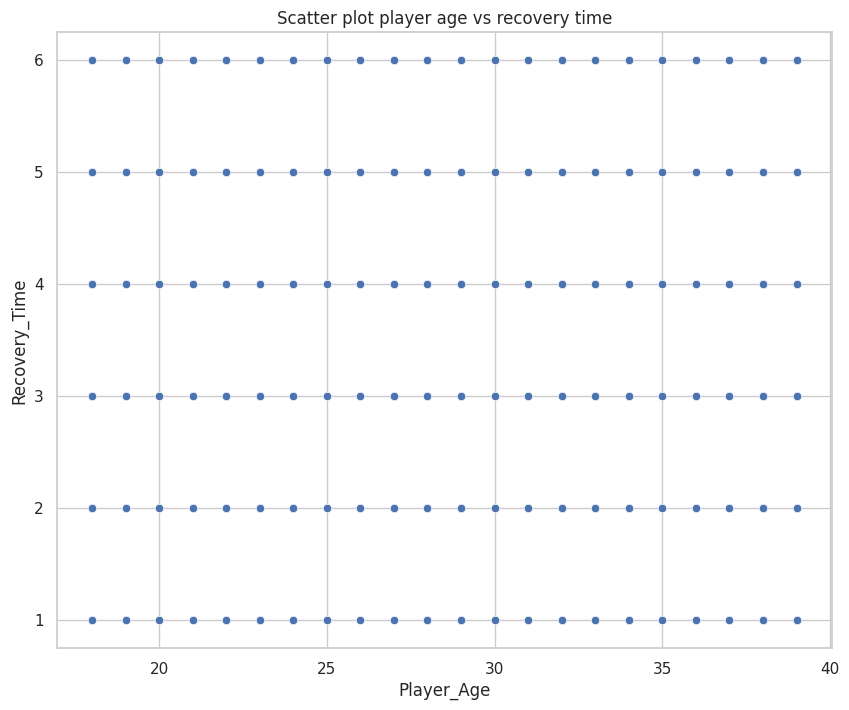

In [25]:
#Scatter plot player age vs recovery time
plt.figure(figsize=(10,8), dpi=100)
sns.scatterplot(data=df, x="Player_Age", y="Recovery_Time")
plt.title("Scatter plot player age vs recovery time")
plt.show()

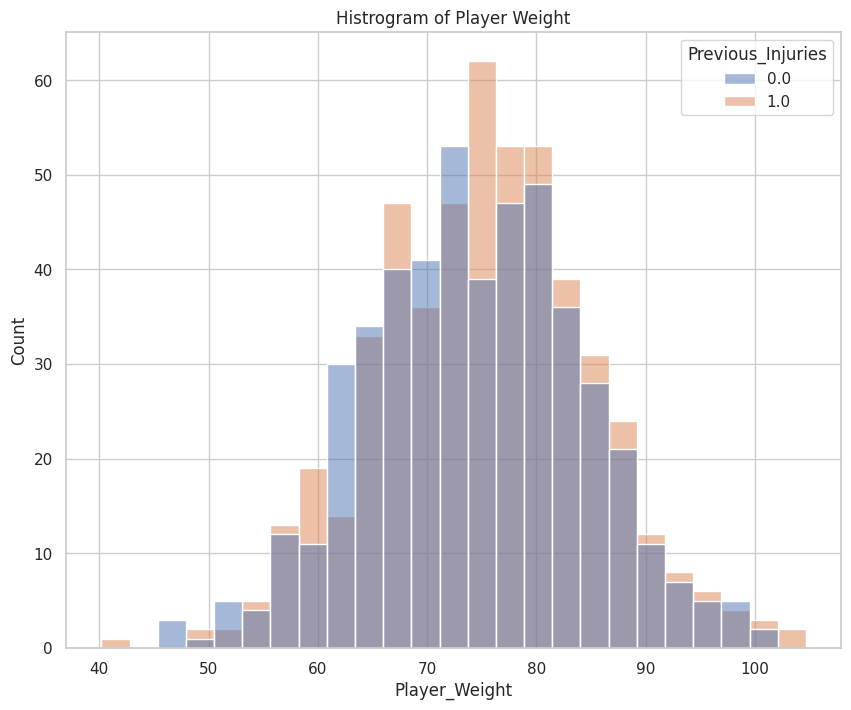

In [26]:
#Histogram: player weight(must do categorization)
plt.figure(figsize=(10,8), dpi=100)
sns.histplot(data=df, x="Player_Weight",hue='Previous_Injuries')
plt.title("Histrogram of Player Weight")
plt.show()

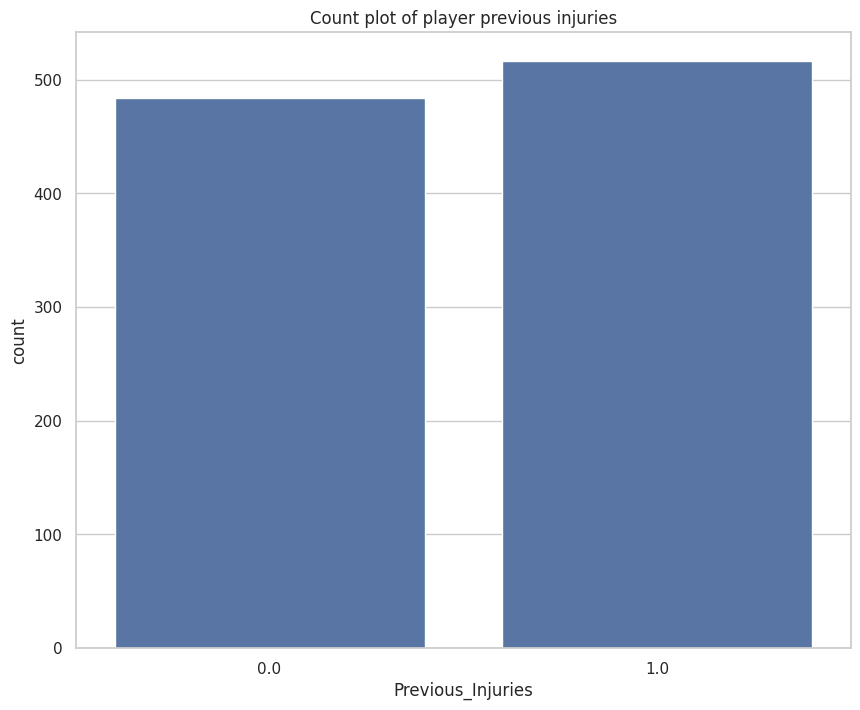

In [27]:
#Count plot of player previous injuries
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x="Previous_Injuries")
plt.title("Count plot of player previous injuries")
plt.show()

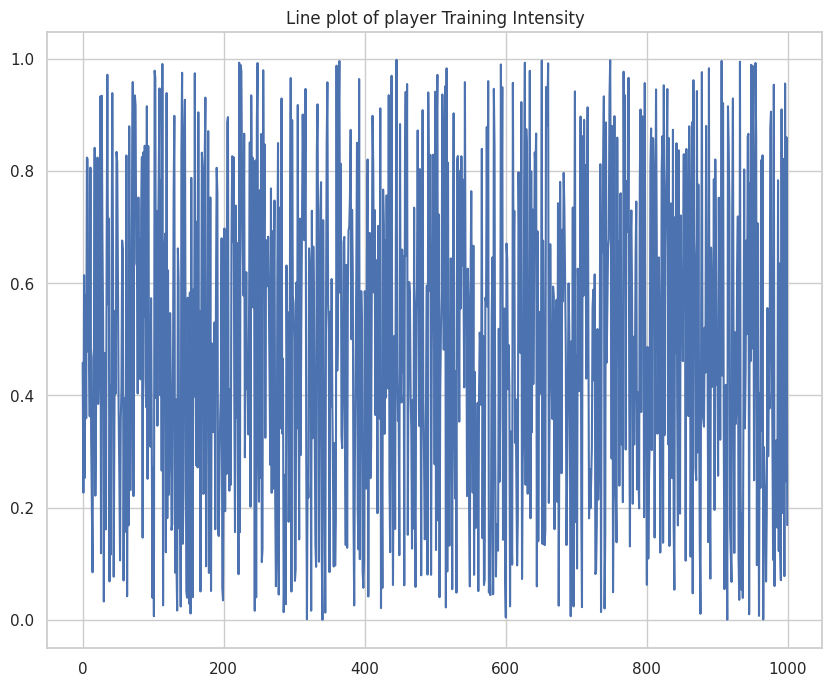

In [28]:
#Line plot of player Training Intensity
plt.figure(figsize=(10,8), dpi=100)
plt.plot(df["Training_Intensity"])
plt.title("Line plot of player Training Intensity")
plt.show()

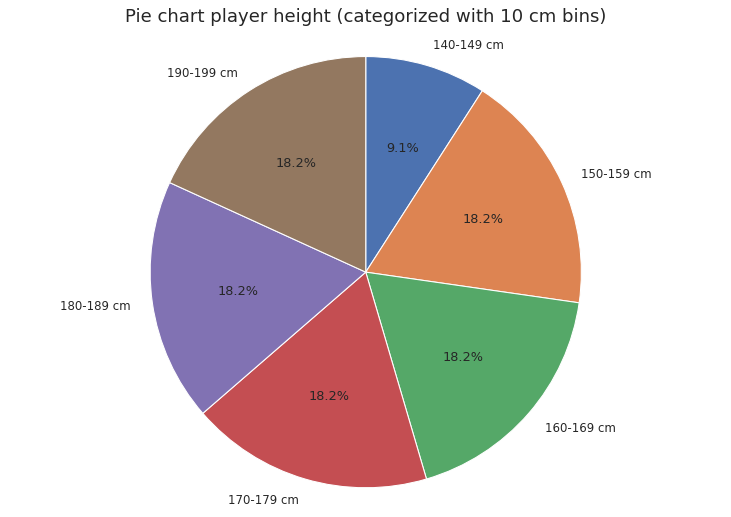

In [30]:
#Pie chart player height(categorize with 10 cm bins) 140-200 6 bins
player_heights = [150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]
bins = range(140, 210, 10)
labels = [f'{bin}-{bin+9} cm' for bin in bins[:-1]]
height_bins = pd.cut(player_heights, bins=bins, labels=labels)
height_counts = height_bins.value_counts().sort_index()

plt.figure(figsize=(12, 8), dpi=77)
plt.pie(height_counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Pie chart player height (categorized with 10 cm bins)", size=17, pad=13)
plt.axis('equal')
plt.show()